In [2]:
import pandas as pd
import networkx as nx
from tqdm import tqdm_notebook as tqdm


# ETH blocks

In [3]:
blocks=pd.read_csv("archive/blocks.csv",index_col=0)
blocks.head()

,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count
number,,,,,,,,,,,,,,,,,
9000000,0x388f34dd94b899f65bbd23006ee93d61434a2f2a5705...,0xdbfa2da5922a4833994af5016b5ccfb2e5a4838fb443...,0xc0bb87c0203c3709,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x40001000080800181008140500001854008901123400...,0xc357c22c4c9739ece996017524efb56bf7f5fe97a7ef...,0xd863e5b2ecf3dc0276aefe50762d39659811b1f10c91...,0x47aa6890ebab9253cf03286cb7b53edeec912c4032c8...,0x829bd824b016326a401d083b33d092293333a830,2573664196528490,13014076996386893192616,41360,0x7070796520e4b883e5bda9e7a59ee4bb99e9b1bc,9994051,9978336,1574706444,95
9000001,0x8992ef3955e5f793f0ad9a3ed97472b5330dbd25c92f...,0x388f34dd94b899f65bbd23006ee93d61434a2f2a5705...,0x21791ca8cacb9a8d,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x040012004080000b3018849002580ab53a843b881e00...,0x57569885299b578f72b6fb68f65eba60f34a1edcb8eb...,0xa1b25c6ee4076797eaf02dce863a13651a3738a04ff3...,0x33791066b327e40fd8495a40bd8f91eda4f8ad617426...,0x44fd3ab8381cc3d14afa7c4af7fd13cdc65026e1,2571425730493512,13014079567812623686128,34751,0x70707965207762,9984293,9937255,1574706479,119
9000002,0xd18199fd103a7d66f3d9726ecb57398697b9709bb867...,0x8992ef3955e5f793f0ad9a3ed97472b5330dbd25c92f...,0x09ff4acce3ff00fe,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x14000100000a00080000600480400d04420100c10200...,0x294823e1c8cb91a9a965d75c825b44bb1f9a9fd69ca1...,0x7c0c993f5807a4d94c4f06970e8aac10a1658e794a31...,0x0c7bd26b258bd0f0686531cdaf571d14eb09609281fc...,0xd7a15baeb7ea05c9660cbe03fb7999c2c2e57625,2572956187370423,13014082140768811056551,16998,0x50505945204143432d4d424c31,9974544,5583709,1574706486,69
9000003,0x1304ee0bed1e621b7de2d6b5749f46246d8985a1103c...,0xd18199fd103a7d66f3d9726ecb57398697b9709bb867...,0x20a20be01b3b275a,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x22000a200020d42c02aa2018240028f61248c4868439...,0xe207788e6a7f1c986ef2a91ef8895d2c1e7f6f85e9ee...,0x320207613356ee7fd8d63642b46af3b4a37e1d44b905...,0xba9a6856ce19c3619b3ef0a3c2bfbed1bbc7578c9613...,0xb2930b35844a230f00e51431acae96fe543a0347,2571974739014003,13014084712743550070554,33292,0x73656f32,9964840,9958654,1574706505,114
9000004,0xaa675351de9c1ce66f2f228f9a219f7df77e7bb678d5...,0x1304ee0bed1e621b7de2d6b5749f46246d8985a1103c...,0x48fc58c0000da500,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x264812c44212008c02d824142c0470b23a80dccd070d...,0xe98fe4155b199b92ef47ac416514f142cfc24a227c5c...,0xa7268bcc121953fa8a6aab3cf9837e86efaac5ad9d87...,0x4517a5b99c4af38250d1736198937b3f7c2862947092...,0xd224ca0c819e8e97ba0136b3b95ceff503b79f53,2570993769880413,13014087283737319950967,24413,0x7575706f6f6c2e636e2d3062386461326532,9955110,9953766,1574706523,142


In [14]:
list (blocks.columns)

['hash',
 'parent_hash',
 'nonce',
 'sha3_uncles',
 'logs_bloom',
 'transactions_root',
 'state_root',
 'receipts_root',
 'miner',
 'difficulty',
 'total_difficulty',
 'size',
 'extra_data',
 'gas_limit',
 'gas_used',
 'timestamp',
 'transaction_count']

# Create Bipartite Network

In [149]:
blocks[blocks.miner=="0x1c93dc7fefccfa4dd18e233ab1a09c94ec0675e1"]

,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count
number,,,,,,,,,,,,,,,,,
9165069,0x397dae91c04a0f989bd8bd20b3bbfe85a645b572cb95...,0xa95d175aa1f49dd9e36dab7ea35947242c96588725fa...,0xaa06bd1563057020,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00001000000000000000000000000040000801000000...,0xe7321d372fef515e843e0ee85f502e073fbdb3d2f65c...,0xbd42210e489f47619c85380c24618d5c9b6ed79f4fad...,0x2fdf9b362b4184f6568343445650e5f77b6c96144550...,0x1c93dc7fefccfa4dd18e233ab1a09c94ec0675e1,2421562505088943,13437927002588214369794,3187,0x755a54614b746b543867,9980417,668880,1577352297,16


In [146]:
M_reverse_ids

{'0xd6840e76478bf4e6eed42c06b237a40d4b4ce54e': 'm1',
 '0xe16263ee79b0ee32c242c99f02559e92abaea9eb': 'm2',
 '0x652d38d814bcdf3e0f750a0faf272ee96c1f67ed': 'm3',
 '0x6f26e02b068d5a4abd97dfcdbb26b9e2c4ab0b8a': 'm4',
 '0x12eb9bce34341d1163814843f8dca44dfebe913c': 'm5',
 '0x8595dd9e0438640b5e1254f9df579ac12a86865f': 'm6',
 '0xac34420c1a657273bba4927be3f2552a082ca918': 'm7',
 '0x96cd428525f199279768e8f47a2dbba76604066f': 'm8',
 '0xc1aa9758c5a647d3807e7bcbcf07c09f55ba6c52': 'm9',
 '0xd1008015aa0cf2a61493bd19de6c9ca88e934fce': 'm10',
 '0x829bd824b016326a401d083b33d092293333a830': 'm11',
 '0xba423942d5dcac687599c1e9aae59ef9143c5c6b': 'm12',
 '0xb46c577af8e31fc3c29465b54f761fd327d3813a': 'm13',
 '0xcf92ab29434e91dd0cd6f69a445a62779cef1e86': 'm14',
 '0x9d6d492bd500da5b33cf95a5d610a73360fcaaa0': 'm15',
 '0xb592991a7418ebeac32956871c6cf820c18589cf': 'm16',
 '0x0e237b7d354a7c6671884b6e95ea862a9fcb2896': 'm17',
 '0xf35074bbd0a9aee46f4ea137971feec024ab704e': 'm18',
 '0x00192fb10df37c9fb26829eb2cc623cd1

In [4]:
#generate nodes
blocks_=set(blocks.index)
miners_=set(blocks.miner)
print(len(blocks_)," Blocks")
print(len(miners_)," Miners")

439334  Blocks
186  Miners


In [86]:
M_reverse_ids={}
m_id=1
miners_f=set()
for m in miners_:
    if m not in M_reverse_ids:
        M_reverse_ids[m]="m"+str(m_id)
        miners_f.add("m"+str(m_id))
        m_id+=1

In [138]:
Bi = nx.Graph()
Bi.add_nodes_from(miners_f, bipartite=0)
Bi.add_nodes_from(blocks_, bipartite=1)

In [139]:
edges=[(M_reverse_ids[blocks["miner"][block]],block) for block in blocks.index]
len(edges)

439334

In [140]:
Bi.add_edges_from(edges,)

In [141]:
for i in edges:
    if "m91" in i:
        print(i)

('m91', 9273986)


# Analyze the Bipartite Network

In [179]:
degree_sequence = {n:d for n, d in Bi.degree(miners_f)}
degree_sequence_={k: v for k, v in sorted(degree_sequence.items(), key=lambda item: item[1],reverse=True)}

In [180]:
degree_sequence_

{'m34': 141162,
 'm177': 96445,
 'm11': 48205,
 'm72': 34539,
 'm63': 20015,
 'm35': 12575,
 'm111': 7307,
 'm183': 6037,
 'm86': 5579,
 'm109': 5351,
 'm45': 4622,
 'm54': 4397,
 'm3': 4043,
 'm67': 3999,
 'm106': 3780,
 'm38': 3742,
 'm162': 3634,
 'm165': 3317,
 'm19': 3073,
 'm135': 2773,
 'm15': 2087,
 'm100': 1742,
 'm163': 1515,
 'm21': 1444,
 'm74': 1408,
 'm108': 1208,
 'm166': 1197,
 'm68': 1090,
 'm182': 1051,
 'm71': 965,
 'm61': 956,
 'm150': 767,
 'm6': 733,
 'm126': 666,
 'm60': 595,
 'm18': 499,
 'm147': 495,
 'm94': 485,
 'm164': 440,
 'm148': 430,
 'm24': 396,
 'm155': 388,
 'm154': 348,
 'm32': 318,
 'm173': 310,
 'm107': 234,
 'm186': 228,
 'm51': 222,
 'm132': 220,
 'm113': 182,
 'm143': 180,
 'm128': 180,
 'm46': 173,
 'm5': 169,
 'm153': 124,
 'm168': 121,
 'm29': 107,
 'm87': 103,
 'm149': 103,
 'm10': 76,
 'm62': 58,
 'm90': 51,
 'm104': 46,
 'm133': 46,
 'm98': 44,
 'm69': 44,
 'm49': 43,
 'm178': 42,
 'm140': 41,
 'm2': 38,
 'm136': 33,
 'm112': 33,
 'm185': 

In [185]:
degree_sequence_F=list(degree_sequence_.values())

In [188]:
degree_sequence_

{'m34': 141162,
 'm177': 96445,
 'm11': 48205,
 'm72': 34539,
 'm63': 20015,
 'm35': 12575,
 'm111': 7307,
 'm183': 6037,
 'm86': 5579,
 'm109': 5351,
 'm45': 4622,
 'm54': 4397,
 'm3': 4043,
 'm67': 3999,
 'm106': 3780,
 'm38': 3742,
 'm162': 3634,
 'm165': 3317,
 'm19': 3073,
 'm135': 2773,
 'm15': 2087,
 'm100': 1742,
 'm163': 1515,
 'm21': 1444,
 'm74': 1408,
 'm108': 1208,
 'm166': 1197,
 'm68': 1090,
 'm182': 1051,
 'm71': 965,
 'm61': 956,
 'm150': 767,
 'm6': 733,
 'm126': 666,
 'm60': 595,
 'm18': 499,
 'm147': 495,
 'm94': 485,
 'm164': 440,
 'm148': 430,
 'm24': 396,
 'm155': 388,
 'm154': 348,
 'm32': 318,
 'm173': 310,
 'm107': 234,
 'm186': 228,
 'm51': 222,
 'm132': 220,
 'm113': 182,
 'm143': 180,
 'm128': 180,
 'm46': 173,
 'm5': 169,
 'm153': 124,
 'm168': 121,
 'm29': 107,
 'm87': 103,
 'm149': 103,
 'm10': 76,
 'm62': 58,
 'm90': 51,
 'm104': 46,
 'm133': 46,
 'm98': 44,
 'm69': 44,
 'm49': 43,
 'm178': 42,
 'm140': 41,
 'm2': 38,
 'm136': 33,
 'm112': 33,
 'm185': 

In [205]:
nodes_and_neighbors=set()
s_nodes=['m34',
 ]
for m in s_nodes:
    nodes_and_neighbors=nodes_and_neighbors.union(Bi.neighbors(m))
nodes_and_neighbors=nodes_and_neighbors.union(set(s_nodes))

In [206]:
len(nodes_and_neighbors)

141163

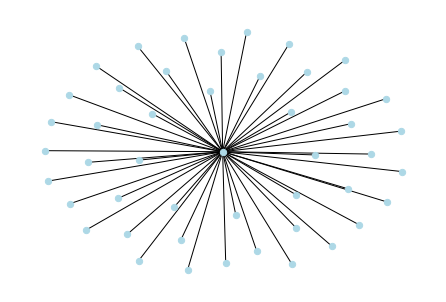

In [195]:
H = nx.subgraph(Bi,nodes_and_neighbors )
nx.draw(H, with_labels=False, node_color='lightblue', node_size=40)

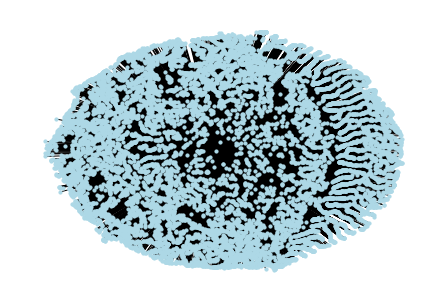

In [198]:
H = nx.subgraph(Bi,nodes_and_neighbors )
nx.draw(H, with_labels=False, node_color='lightblue', node_size=10)

In [123]:
nx.draw??

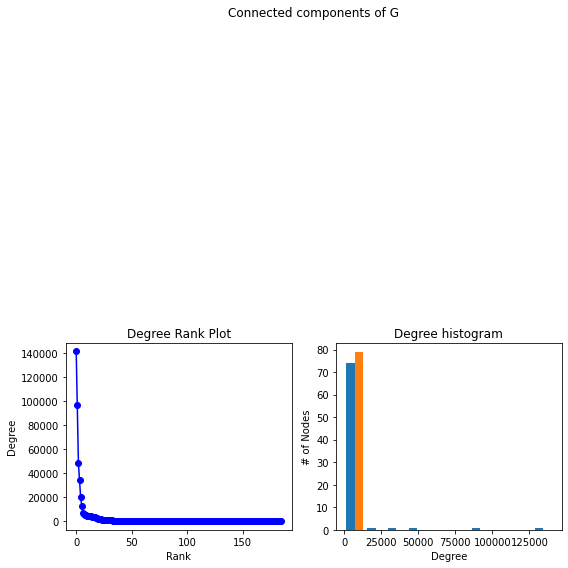

In [186]:
dmax = max(degree_sequence_F)
import matplotlib.pyplot as plt
import numpy
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
#Gcc = Bi.subgraph(sorted(nx.connected_components(Bi), key=len, reverse=True)[0])
#pos = nx.spring_layout(Gcc, seed=10396953)
#nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
#nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence_F, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.hist(np.unique(degree_sequence_F, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [59]:
np.unique(degree_sequence, return_counts=True)

(array([     1,      2,      3,      5,      7,      8,     10,     14,
            19,     22,     24,     29,     33,     38,     41,     42,
            43,     44,     46,     51,     58,     76,    103,    107,
           121,    124,    169,    173,    180,    182,    220,    222,
           228,    234,    310,    318,    348,    388,    396,    430,
           440,    485,    495,    499,    595,    666,    733,    767,
           956,    965,   1051,   1090,   1197,   1208,   1408,   1444,
          1515,   1742,   2087,   2773,   3073,   3317,   3634,   3742,
          3780,   3999,   4043,   4397,   4622,   5351,   5579,   6037,
          7307,  12575,  20015,  34539,  48205,  96445, 141162]),
 array([96,  4,  2,  3,  2,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
         2,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1

In [48]:
len(degree_sequence)

186

<AxesSubplot:>

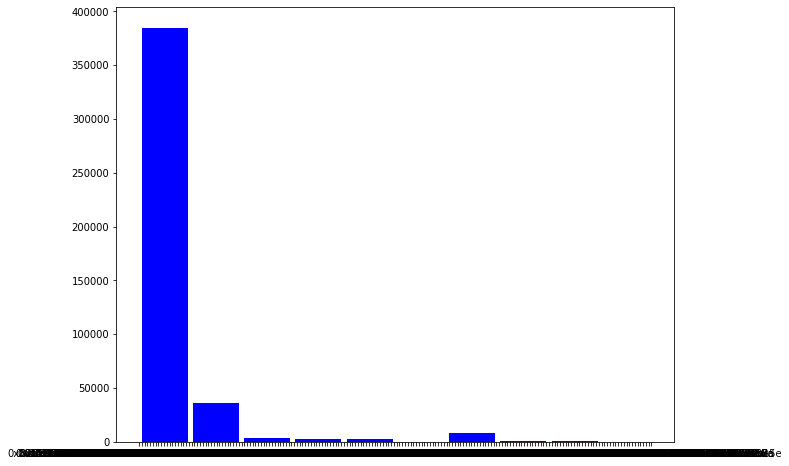

In [20]:
blocks["miner"].hist(bins=10,grid=False, figsize=(10,8), color='blue', zorder=2, rwidth=0.9)

In [208]:
import math

# Fairness

In [238]:
firness_u=0.
firness_d=0.
for miner in miners_f:
    firness_u+=(Bi.degree(miner)/len(blocks_f))
    firness_d+=math.pow(Bi.degree(miner)/len(blocks_f),2)


In [239]:
fairness=(math.pow(firness_u,2)/(len(miners_f)*firness_d))

In [240]:
n_fairness=(fairness-(1./len(miners_f)))/(1.-(1./len(miners_f)))
n_fairness

0.02562650783901958

# Euc Distance

In [247]:
euc_=0.
for miner in miners_f:
    euc_+=math.pow(((Bi.degree(miner)/len(blocks_f)) - (1./len(miners_f))),2)
math.sqrt(euc_)

0.41086768200072915

# Minkowski_dist

In [255]:
r=1000
minkowski_=0.
for miner in miners_f:
    minkowski_+=math.pow(math.pow(abs((Bi.degree(miner)/len(blocks_f)) - (1./len(miners_f))),r),1)
math.pow(minkowski_,(1./r))

0.0

# SIMILARITY MEASURE

In [256]:
pi_si=0.
pi_=0.
si_=0.
for miner in miners_f:
    pi_si+=(((Bi.degree(miner)/len(blocks_f)) * (1./len(miners_f))))
    pi_+=(Bi.degree(miner)/len(blocks_f))
    si_+=(1./len(miners_f))
cos=pi_si/(pi_*si_)
cos

0.0053763440860214945